In [ ]:
#Kütüphaneleri import edelim

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical



from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [ ]:
#Keras'ının özelliği ile load_data fonksiyonunu kullanarak veri setini train ve test olarak ayıralım. 50000 eğitim verisi, 10000 test verisi vardır.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Boyutları print methodu aracıyla düzenli ve sıralı yazdıralım...
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#50000 Eğitim 10000 Test verisi içermektedir.
#Her bir görüntü 32X32 piksel boyutundadır ve 3 renk kanalına sahiptir.
#Shape methodununu kullanarak her bir görüntüun boyutlarını yazdıralım.
print("Görüntü boyutu:", X_train.shape[1:])

Görüntü boyutu: (32, 32, 3)


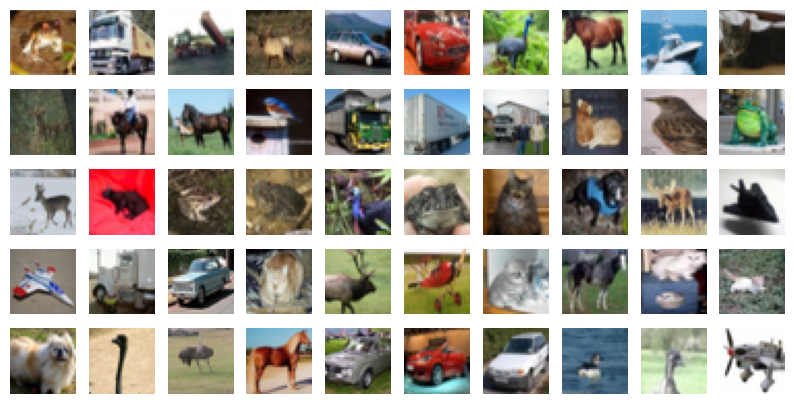

In [ ]:
# 50 görüntüyü görselleştir
#figure methodu ile sığdırılacak boyutu ayarlıyoruz
plt.figure(figsize=(10, 5))
#0-49 döngü oluşturuyoruz
for i in range(50):
  #subplot methodu ile 5x10 subplot oluşturuyoruz
    plt.subplot(5, 10, i+1)
    #imshow methodu ile görselleştiriyoruz
    plt.imshow(X_train[i])
    #axis methodu ile x ve y eksenlerini gizliyoruz. Görselimizin daha temiz ve net olmasını sağlıyoruz.
    plt.axis('off')
#show methodu ile görüntüleri görsel olarak gösteriyoruz
plt.show()

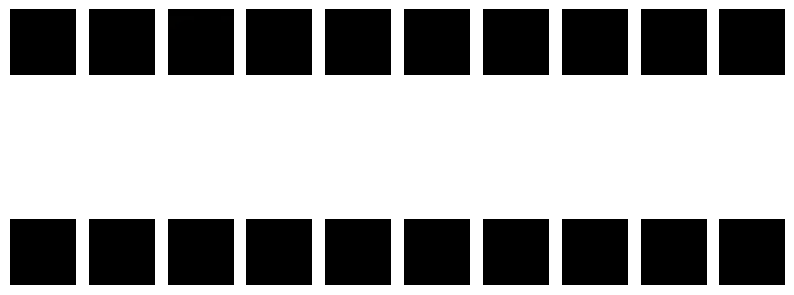

In [ ]:
#Eğitim ve test verilerini normalize edelim.
#Yani piksel değerlerimizi 0-1 arasına ayarlayalım
#Neden 255? Piksel değerleri 0-255 arasındadır. Bu sebeple 255 böldüğümğzde 0-1 arasında değer alırız.

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Normalleştirdiğimiz ilk 20 eğitim resimlerini görelim.
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [ ]:
# Sınıf etiketlerini one-hot encode formatına dönüştüyoruz
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Etiketlerin shape bilgisini yazdırıyoruz
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [ ]:
#Bir CNN modeli oluşturuyoruz.

#Sıralı bir model oluşturur. Modelin mimarısını tanımlarız
model = Sequential()
#32 filtre 3x3 piksel 1.Convolutional katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
#64 filtre 2.COnvolutional katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#Bu satır, bir Dropout katmanı ekler.
#Eğitim sırasında nöronların %25'ini rastgele devre dışı bırakır. Bu, aşırı uyumu önlemek için kullanılır.
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
#CNN modelimizi eğitiyoruz.

#Eğitim de küme sayısı
batch_size = 128
#Eğitim deki iterasyon
epochs = 10

history = model.fit(X_train, y_train,

                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/10
391/391 [==============================] - 241s 615ms/step - loss: 2.1208 - accuracy: 0.2240 - val_loss: 1.9726 - val_accuracy: 0.3040
Epoch 2/10
391/391 [==============================] - 253s 646ms/step - loss: 1.9588 - accuracy: 0.3000 - val_loss: 1.8748 - val_accuracy: 0.3372
Epoch 3/10
391/391 [==============================] - 254s 650ms/step - loss: 1.8845 - accuracy: 0.3269 - val_loss: 1.7894 - val_accuracy: 0.3669
Epoch 4/10
391/391 [==============================] - 248s 635ms/step - loss: 1.8286 - accuracy: 0.3467 - val_loss: 1.7380 - val_accuracy: 0.3858
Epoch 5/10
391/391 [==============================] - 250s 640ms/step - loss: 1.7969 - accuracy: 0.3570 - val_loss: 1.7139 - val_accuracy: 0.3869
Epoch 6/10
391/391 [==============================] - 260s 663ms/step - loss: 1.7735 - accuracy: 0.3679 - val_loss: 1.6921 - val_accuracy: 0.3992
Epoch 7/10
391/391 [==============================] - 242s 619ms/step - loss: 1.7559 - accuracy: 0.3746 - val_loss: 1.6828 -

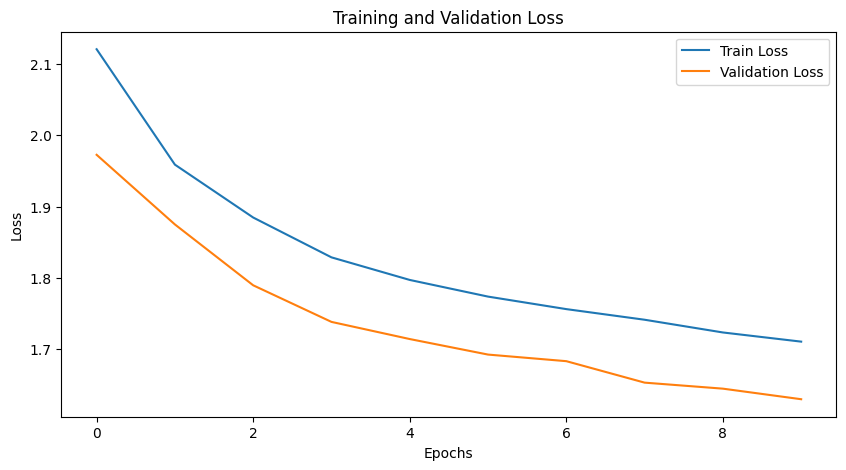

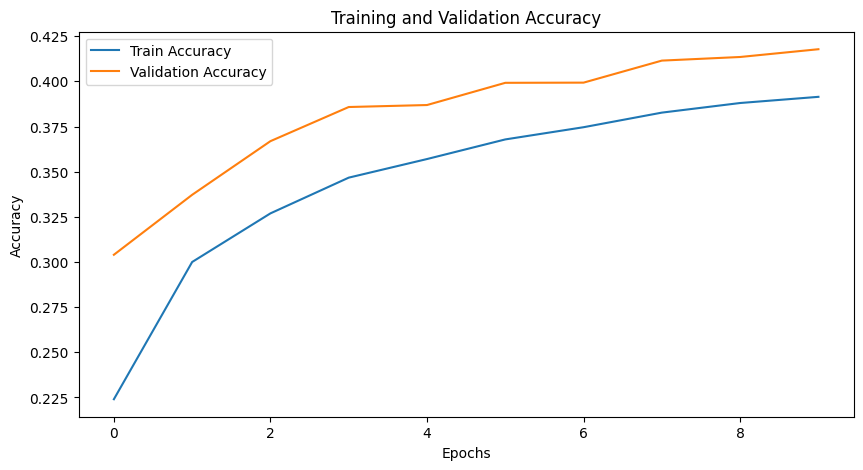

313/313 [==============================] - 13s 41ms/step


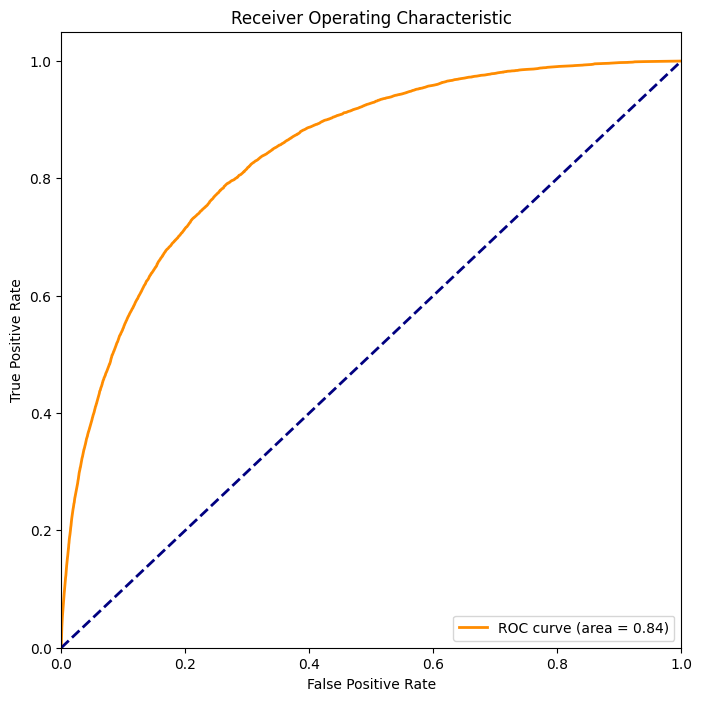

In [13]:
# Eğitim ve doğrulama kayıplarını çizdirme
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluklarını çizdirme
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model eğitimi sonrası tahminleri alın
y_pred = model.predict(X_test)

# Gerçek etiketler (one-hot encoded) ve tahminler (olasılıklar) için ROC eğrisini hesaplayın
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ortalama ROC eğrisi ve AUC hesaplamaları
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Ortalama TPR
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ROC eğrisini çizdirme
plt.figure(figsize=(8, 8))
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()